# Cards Model Test

In [40]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from jass.train.label_play import LabelPlay
from jass.logs.game_log_entry import GameLogEntry
from jass.game.game_state_util import state_from_complete_game, calculate_starting_hands_from_game
from jass.game.rule_schieber import RuleSchieber
from examples.io.convert_swisslos_log_to_games import LogParserSwisslos

In [49]:
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

trick_cards = [

't_DA','t_DK','t_DQ','t_DJ','t_D10','t_D9','t_D8','t_D7','t_D6',# Diamonds
't_HA','t_HK','t_HQ','t_HJ','t_H10','t_H9','t_H8','t_H7','t_H6',# Hearts
't_SA','t_SK','t_SQ','t_SJ','t_S10','t_S9','t_S8','t_S7','t_S6',# Spades
't_CA','t_CK','t_CQ','t_CJ','t_C10','t_C9','t_C8','t_C7','t_C6'# Clubs
]

user  = ['user']
trump = ['trump']
played_card  = ['played_card']

rule = RuleSchieber()

entries = []
path = Path("../jass-games") / "jass_game_0001.txt"
with open(path) as file:
    line = file.readline()
    #while line:
    for x in range(1000):
        content = json.loads(line)
        entry = GameLogEntry.from_json(content)
        entries.append(entry)
        line = file.readline()

#entries = LogParserSwisslos.parse_rounds(path)

rows = []

for entry in entries:
    for nrCards in range(0,34):
        # VALID CARDS [36]
        round_state = state_from_complete_game(entry.game, nrCards)
        valid_cards = rule.get_valid_cards_from_state(round_state)# valid cards for player
        row = valid_cards
        
        # TRUMP [1]
        row = np.append(row, round_state.trump)
        
        # PLAYED CARD [1]
        next_round_state = state_from_complete_game(entry.game, nrCards + 1)
        #print(round_state.current_trick)
        #print(next_round_state.tricks[round_state.nr_tricks])
        card = np.setdiff1d(next_round_state.tricks[round_state.nr_tricks], round_state.current_trick)
        #print(card)
        row = np.append(row,card[0])
        
        # CURRENT TRICK [36] where 0-3 elements = 1, rest = 
        current_trick_cards = np.zeros(36, dtype=int)
        current_trick = round_state.current_trick[0:3]
        current_trick = np.delete(current_trick, np.where(current_trick == -1))
        #print(current_trick)
        current_trick_cards[current_trick] = 1
        #print(current_trick_cards)
        row = np.append(row, current_trick_cards)
        rows.append(row)

data =pd.DataFrame(data=rows ,columns=cards + trump + played_card + trick_cards)

pd.set_option('display.max_columns', None)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,HK,HQ,HJ,H10,H9,H8,H7,H6,SA,SK,SQ,SJ,S10,S9,S8,S7,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,trump,played_card,t_DA,t_DK,t_DQ,t_DJ,t_D10,t_D9,t_D8,t_D7,t_D6,t_HA,t_HK,t_HQ,t_HJ,t_H10,t_H9,t_H8,t_H7,t_H6,t_SA,t_SK,t_SQ,t_SJ,t_S10,t_S9,t_S8,t_S7,t_S6,t_CA,t_CK,t_CQ,t_CJ,t_C10,t_C9,t_C8,t_C7,t_C6
0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## import player statistics

In [50]:
#stats = pd.read_json("04 Data/stat/player_all_stat.json")
#stats.head()

In [51]:
#stats.sort_values(by=['mean'], ascending=False)

# Drop bad players

In [52]:
#good_users = stats.loc[(stats['mean'] > 79) & (stats['nr'] > 5)]
#good_users

In [53]:
#data = data[data['user'].isin(good_users['id'])]
#data

# Training

In [54]:
from sklearn.model_selection import train_test_split
feature_columns = trick_cards


In [56]:
x_data = data[cards + trump + feature_columns]
y_data = data.played_card

In [57]:
X_train, X_test, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.2, stratify=data.played_card, random_state=42)

print(y_train_data)
#y_train_label = np.argmax(x_train, axis=1)
#y_categorical = tf.keras.utils.to_categorical(y_train_label, num_classes=4)

22073     7
30216     8
6398     35
13460     8
6082     32
         ..
9197     24
26809     6
2698      4
6441     26
6709     31
Name: played_card, Length: 27200, dtype: int64


In [58]:
y_train = pd.get_dummies(y_train_data)
y_test = pd.get_dummies(y_test_data)
print(y_train)

       0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
22073   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
30216   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
6398    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13460   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
6082    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
9197    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26809   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
2698    0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
6441    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6709    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       18  19  20  21  22  

In [59]:
input_length = len(cards + trump + feature_columns)

model = keras.Sequential()
model.add(keras.layers.Dense(input_length, activation='relu', input_shape=[input_length]))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(54, activation='relu'))
model.add(keras.layers.Dense(54, activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
204/204 [==============================] - 1s 3ms/step - loss: 3.5829 - accuracy: 0.0302 - val_loss: 3.5814 - val_accuracy: 0.0351
Epoch 2/300
204/204 [==============================] - 0s 2ms/step - loss: 3.5796 - accuracy: 0.0347 - val_loss: 3.5783 - val_accuracy: 0.0401
Epoch 3/300
204/204 [==============================] - 0s 2ms/step - loss: 3.5762 - accuracy: 0.0415 - val_loss: 3.5755 - val_accuracy: 0.0462
Epoch 4/300
204/204 [==============================] - 0s 2ms/step - loss: 3.5737 - accuracy: 0.0431 - val_loss: 3.5721 - val_accuracy: 0.0525
Epoch 5/300
204/204 [==============================] - 0s 2ms/step - loss: 3.5696 - accuracy: 0.0464 - val_loss: 3.5677 - val_accuracy: 0.0594
Epoch 6/300
204/204 [==============================] - 0s 2ms/step - loss: 3.5648 - accuracy: 0.0444 - val_loss: 3.5619 - val_accuracy: 0.0635
Epoch 7/300
204/204 [==============================] - 0s 2ms/step - loss: 3.5593 - accuracy: 0.0503 - val_loss: 3.5539 - val_accuracy: 0.0706

204/204 [==============================] - 0s 2ms/step - loss: 2.1277 - accuracy: 0.3785 - val_loss: 1.8451 - val_accuracy: 0.4507
Epoch 58/300
204/204 [==============================] - 0s 2ms/step - loss: 2.1138 - accuracy: 0.3825 - val_loss: 1.8078 - val_accuracy: 0.4535
Epoch 59/300
204/204 [==============================] - 0s 2ms/step - loss: 2.1028 - accuracy: 0.3830 - val_loss: 1.8134 - val_accuracy: 0.4521
Epoch 60/300
204/204 [==============================] - 0s 2ms/step - loss: 2.1053 - accuracy: 0.3800 - val_loss: 1.8133 - val_accuracy: 0.4474
Epoch 61/300
204/204 [==============================] - 1s 2ms/step - loss: 2.0992 - accuracy: 0.3829 - val_loss: 1.7897 - val_accuracy: 0.4526
Epoch 62/300
204/204 [==============================] - 0s 2ms/step - loss: 2.0779 - accuracy: 0.3858 - val_loss: 1.8046 - val_accuracy: 0.4524
Epoch 63/300
204/204 [==============================] - 0s 2ms/step - loss: 2.0777 - accuracy: 0.3877 - val_loss: 1.7719 - val_accuracy: 0.4535
Epoch

Epoch 114/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8669 - accuracy: 0.4332 - val_loss: 1.6674 - val_accuracy: 0.4724
Epoch 115/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8746 - accuracy: 0.4284 - val_loss: 1.6768 - val_accuracy: 0.4713
Epoch 116/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8652 - accuracy: 0.4326 - val_loss: 1.6720 - val_accuracy: 0.4751
Epoch 117/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8663 - accuracy: 0.4292 - val_loss: 1.6623 - val_accuracy: 0.4756
Epoch 118/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8640 - accuracy: 0.4303 - val_loss: 1.6713 - val_accuracy: 0.4725
Epoch 119/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8553 - accuracy: 0.4318 - val_loss: 1.6662 - val_accuracy: 0.4735
Epoch 120/300
204/204 [==============================] - 0s 2ms/step - loss: 1.8568 - accuracy: 0.4350 - val_loss: 1.6673 - val_ac

204/204 [==============================] - 0s 2ms/step - loss: 1.7347 - accuracy: 0.4565 - val_loss: 1.6185 - val_accuracy: 0.4787
Epoch 171/300
204/204 [==============================] - 0s 2ms/step - loss: 1.7382 - accuracy: 0.4576 - val_loss: 1.6062 - val_accuracy: 0.4831
Epoch 172/300
204/204 [==============================] - 0s 2ms/step - loss: 1.7300 - accuracy: 0.4534 - val_loss: 1.6052 - val_accuracy: 0.4821
Epoch 173/300
204/204 [==============================] - 0s 2ms/step - loss: 1.7350 - accuracy: 0.4576 - val_loss: 1.6014 - val_accuracy: 0.4819
Epoch 174/300
204/204 [==============================] - 0s 2ms/step - loss: 1.7299 - accuracy: 0.4589 - val_loss: 1.6251 - val_accuracy: 0.4796
Epoch 175/300
204/204 [==============================] - 0s 2ms/step - loss: 1.7269 - accuracy: 0.4613 - val_loss: 1.6418 - val_accuracy: 0.4782
Epoch 176/300
204/204 [==============================] - 0s 2ms/step - loss: 1.7283 - accuracy: 0.4589 - val_loss: 1.6203 - val_accuracy: 0.4776

204/204 [==============================] - 0s 2ms/step - loss: 1.6316 - accuracy: 0.4847 - val_loss: 1.6015 - val_accuracy: 0.4818
Epoch 227/300
204/204 [==============================] - 0s 2ms/step - loss: 1.6359 - accuracy: 0.4811 - val_loss: 1.5962 - val_accuracy: 0.4865
Epoch 228/300
204/204 [==============================] - 0s 2ms/step - loss: 1.6357 - accuracy: 0.4801 - val_loss: 1.6097 - val_accuracy: 0.4879
Epoch 229/300
204/204 [==============================] - 0s 2ms/step - loss: 1.6264 - accuracy: 0.4816 - val_loss: 1.5908 - val_accuracy: 0.4881
Epoch 230/300
204/204 [==============================] - 0s 2ms/step - loss: 1.6339 - accuracy: 0.4847 - val_loss: 1.5989 - val_accuracy: 0.4821
Epoch 231/300
204/204 [==============================] - 0s 2ms/step - loss: 1.6315 - accuracy: 0.4818 - val_loss: 1.6071 - val_accuracy: 0.4810
Epoch 232/300
204/204 [==============================] - 0s 2ms/step - loss: 1.6309 - accuracy: 0.4801 - val_loss: 1.6235 - val_accuracy: 0.4782

204/204 [==============================] - 0s 2ms/step - loss: 1.5510 - accuracy: 0.5004 - val_loss: 1.6190 - val_accuracy: 0.4906
Epoch 283/300
204/204 [==============================] - 0s 2ms/step - loss: 1.5512 - accuracy: 0.5034 - val_loss: 1.6205 - val_accuracy: 0.4885
Epoch 284/300
204/204 [==============================] - 0s 2ms/step - loss: 1.5495 - accuracy: 0.5000 - val_loss: 1.6204 - val_accuracy: 0.4862
Epoch 285/300
204/204 [==============================] - 0s 2ms/step - loss: 1.5416 - accuracy: 0.5053 - val_loss: 1.6372 - val_accuracy: 0.4821
Epoch 286/300
204/204 [==============================] - 0s 2ms/step - loss: 1.5522 - accuracy: 0.5025 - val_loss: 1.6361 - val_accuracy: 0.4884
Epoch 287/300
204/204 [==============================] - 0s 2ms/step - loss: 1.5436 - accuracy: 0.5043 - val_loss: 1.6229 - val_accuracy: 0.4900
Epoch 288/300
204/204 [==============================] - 0s 2ms/step - loss: 1.5497 - accuracy: 0.5046 - val_loss: 1.6443 - val_accuracy: 0.4856

In [60]:
model.evaluate(X_test, y_test)

213/213 [==============================] - 0s 2ms/step - loss: 1.6486 - accuracy: 0.4987


[1.6485565900802612, 0.49867647886276245]

Text(0, 0.5, 'loss')

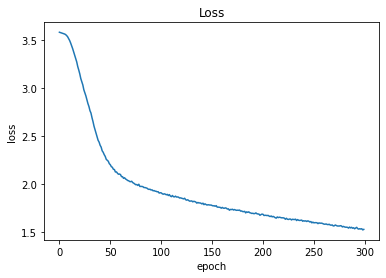

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

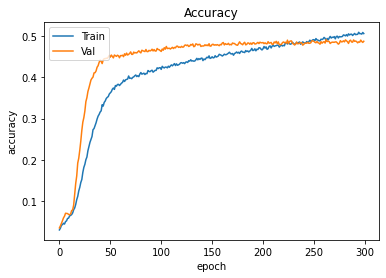

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Predict

In [319]:
def deal_random_hand() -> np.ndarray:
    """
    Deal random hand.

    Returns:
        one hot encoded 1x36 array
    """
    # shuffle card ids
    cards = np.arange(0, 36, dtype=np.int32)
    np.random.shuffle(cards)
    hands = np.zeros(shape=[4, 36], dtype=np.int32)

    # convert to one hot encoded
    hands[0, cards[0:9]] = 1
    hands[1, cards[9:18]] = 1
    hands[2, cards[18:27]] = 1
    hands[3, cards[27:39]] = 1
    
    hand = np.append(hands[0], np.random.randint(0,5))

    return hand

In [1]:
hand = deal_random_hand()
#hand = np.array([[0,1,1,1,0,1,0,0,0, 0,0,0,0,1,0,0,1,0, 1,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0,0,1, 4]])
hand_df = pd.DataFrame(data=[hand], columns=cards+trump)

print(hand_df)
print("\n")
input_hand = np.array([hand_df.iloc[0].values])
prediction = model.predict(input_hand)
prediction = prediction * hand[:-1]
result = pd.DataFrame(data=prediction, columns=cards)
print(result)
result.idxmax(axis=1)

NameError: name 'deal_random_hand' is not defined

In [323]:
#model.save("E:/Work/cards_model50000_0569")

INFO:tensorflow:Assets written to: E:/Work/cards_model50000_0569\assets
